# EXERCICE N°2

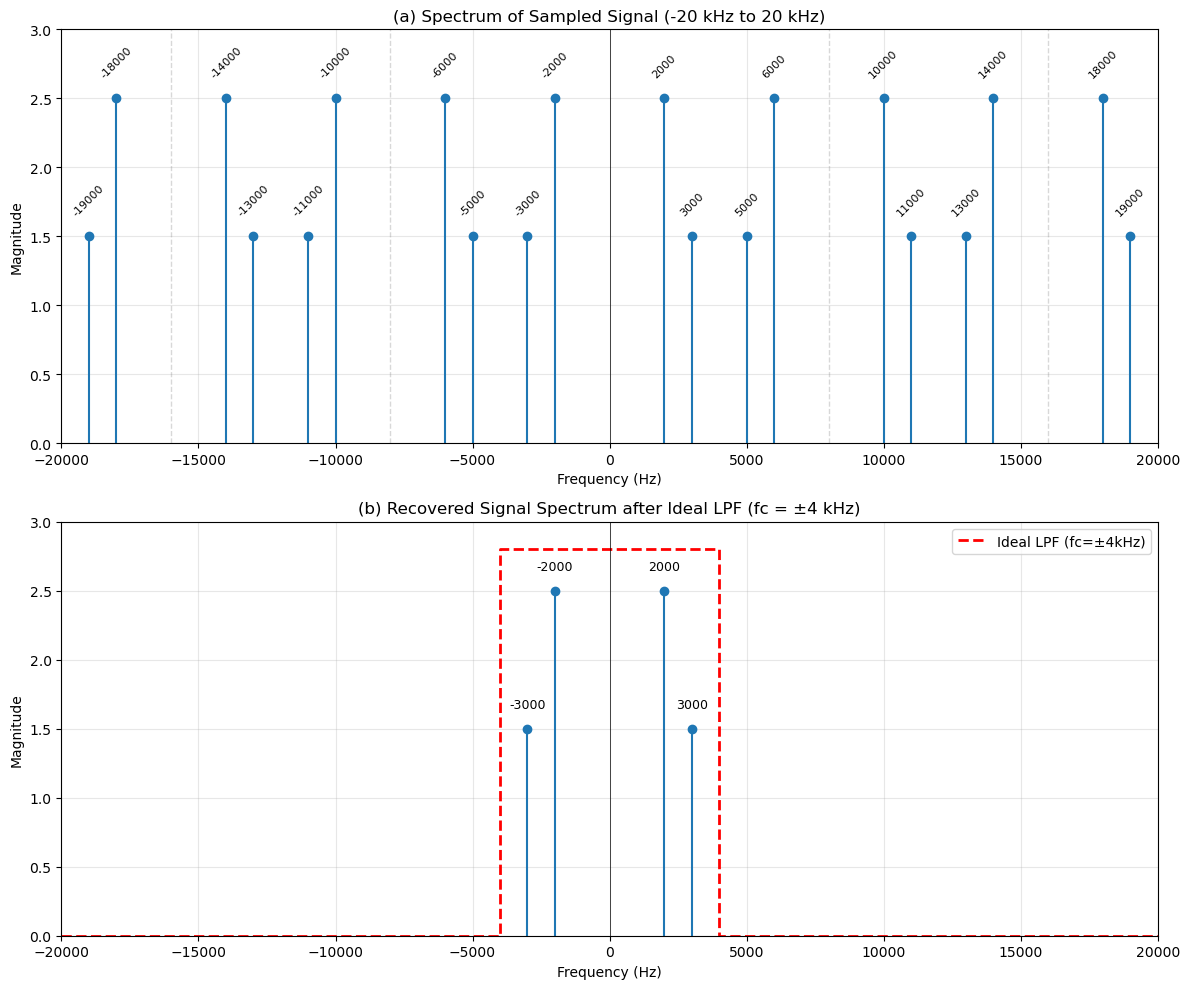

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
f1 = 2000  # First signal frequency (Hz)
f2 = 3000  # Second signal frequency (Hz)
A1 = 5     # Amplitude of first component
A2 = 3     # Amplitude of second component
fs = 8000  # Sampling frequency (Hz)
fc = 4000  # Cutoff frequency for LPF (Hz)

plt.figure(figsize=(12, 10))

# Part (a): Spectrum of sampled signal (0 to 20 kHz)
plt.subplot(2, 1, 1)

# Calculate all frequency components (replicas)
frequencies = []
magnitudes = []

# For f1 = 2000 Hz
for k in range(-2, 3):  # k = -2, -1, 0, 1, 2
    # k*fs + f1
    freq = k * fs + f1
    if -20000 <= freq <= 20000:
        frequencies.append(freq)
        magnitudes.append(A1/2)
    # k*fs - f1
    freq = k * fs - f1
    if -20000 <= freq <= 20000:
        frequencies.append(freq)
        magnitudes.append(A1/2)

# For f2 = 3000 Hz
for k in range(-2, 3):  # k = -2, -1, 0, 1, 2
    # k*fs + f2
    freq = k * fs + f2
    if -20000 <= freq <= 20000:
        frequencies.append(freq)
        magnitudes.append(A2/2)
    # k*fs - f2
    freq = k * fs - f2
    if -20000 <= freq <= 20000:
        frequencies.append(freq)
        magnitudes.append(A2/2)

plt.stem(frequencies, magnitudes, basefmt=' ')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('(a) Spectrum of Sampled Signal (-20 kHz to 20 kHz)')
plt.xlim([-20000, 20000])
plt.ylim([0, 3])
plt.grid(True, alpha=0.3)
plt.axvline(x=0, color='k', linewidth=0.5)

# Mark sampling frequency multiples
for k in [-2, -1, 1, 2]:
    plt.axvline(x=k*fs, color='gray', linestyle='--', alpha=0.3, linewidth=1)

# Annotate key frequencies
for freq, mag in zip(frequencies, magnitudes):
    plt.text(freq, mag + 0.15, f'{int(freq)}', ha='center', fontsize=8, rotation=45)

# Part (b): Recovered signal after LPF with fc = 4 kHz
plt.subplot(2, 1, 2)

# Only keep frequencies below cutoff (considering both positive and negative)
recovered_freq = []
recovered_mag = []
for freq, mag in zip(frequencies, magnitudes):
    if abs(freq) <= fc:
        recovered_freq.append(freq)
        recovered_mag.append(mag)

plt.stem(recovered_freq, recovered_mag, basefmt=' ')

# Draw ideal LPF response
lpf_freq = np.array([-20000, -fc, -fc, fc, fc, 20000])
lpf_response = np.array([0, 0, 1, 1, 0, 0])
plt.plot(lpf_freq, lpf_response * 2.8, 'r--', linewidth=2, label='Ideal LPF (fc=±4kHz)')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('(b) Recovered Signal Spectrum after Ideal LPF (fc = ±4 kHz)')
plt.xlim([-20000, 20000])
plt.ylim([0, 3])
plt.grid(True, alpha=0.3)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.legend()

# Annotate recovered frequencies
for freq, mag in zip(recovered_freq, recovered_mag):
    plt.text(freq, mag + 0.15, f'{int(freq)}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()
